# Preparation

In [1]:
# Import primary function libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2

# Import secondary function libraries
from skimage import io
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, BatchNormalization, AveragePooling2D
from matplotlib import image

# Import tertiary function library
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("Load completed")

2024-04-22 10:44:33.440963: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 10:44:33.441117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 10:44:33.607707: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/street-view-getting-started-with-julia/trainLabels.csv
/kaggle/input/street-view-getting-started-with-julia/train.zip
/kaggle/input/street-view-getting-started-with-julia/sampleSubmission.csv
/kaggle/input/street-view-getting-started-with-julia/resizeData.py
/kaggle/input/street-view-getting-started-with-julia/trainResized.zip
/kaggle/input/street-view-getting-started-with-julia/test.zip
/kaggle/input/street-view-getting-started-with-julia/testResized.zip
/kaggle/input/street-view-getting-started-with-julia/source-code-files.zip
Load completed


# Assign the file directory

In [2]:
# Assign the filepath directory
test_labels = '/kaggle/input/street-view-getting-started-with-julia/trainLabels.csv'
train_img_dir = '/kaggle/output/street-view-getting-started-with-julia/trainResized/'
test_img_dir = '/kaggle/output/street-view-getting-started-with-julia/testResized/'
train_img_zip = '/kaggle/input/street-view-getting-started-with-julia/trainResized.zip'
test_img_zip = '/kaggle/input/street-view-getting-started-with-julia/testResized.zip'
base_dir = '/kaggle/output/street-view-getting-started-with-julia/'

# Generate the compressed file extraction function

In [3]:
# Generate the zipfile extraction function
def data_ext(Dir, Zip):
    if not os.path.exists(Dir):
        os.makedirs(Dir)
    zip_ref = zipfile.ZipFile(Zip)
    zip_ref.extractall(base_dir)
    zip_ref.close()

# Get data features

In [4]:
# Functions including missing values, numbers, records and columns
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f"Number of features {df.shape[1]}\n\n")
    columns = df.columns
    data_type = []

    # Get the data type from each features
    for col in df.columns:
        data_type.append(df[col].dtype)
    n_uni = df.nunique()
    
    # Identify the missing values along with its labels
    n_miss = df.isna().sum()
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name", "Type", "Unique Values", "Missing Values"])
    print(variable_desc)

# Import the datasets

In [5]:
# Import the datasets
data_ext(train_img_dir, train_img_zip)
data_ext(test_img_dir, test_img_zip)
train_data = pd.read_csv(test_labels)

# Show first five rows of the dataset
train_data.head()

,ID,Class
0,1,n
1,2,8
2,3,T
3,4,I
4,5,R


# Visualize the data

In [6]:
# Show data description
data_description(train_data)

Data description
Total number of records 6283
Number of features 2


    Name    Type  Unique Values  Missing Values
0     ID   int64           6283               0
1  Class  object             62               0


In [7]:
train_data['img'] = [train_img_dir + str(id) + '.Bmp' for id in train_data['ID'].values]

lab = []
test = []

for i in os.listdir(test_img_dir):
    test.append(io.imread(test_img_dir+i, as_gray=True))
    lab.append(i.split('.')[0])

In [8]:
test_img = np.array([cv2.resize(image, (28, 28)) for image in test])
test_img = test_img[:, :, :, np.newaxis]
test_img.shape

(6220, 28, 28, 1)

In [9]:
X = train_data.drop("Class", axis=1)
y = train_data["Class"]
print("Format completed")

Format completed


In [10]:
# Assign the dataset's label features
label = train_data['Class']
unique_labels = list(set(label))

# Assign the dataset's ID features
label_id = [unique_labels.index(l) for l in label]
label_id = np.array(label_id, dtype=np.float32)
train_data['label'] = label_id

# Show first five rows of the dataset
train_data.head()

,ID,Class,img,label
0,1,n,/kaggle/output/street-view-getting-started-wit...,37.0
1,2,8,/kaggle/output/street-view-getting-started-wit...,26.0
2,3,T,/kaggle/output/street-view-getting-started-wit...,47.0
3,4,I,/kaggle/output/street-view-getting-started-wit...,51.0
4,5,R,/kaggle/output/street-view-getting-started-wit...,0.0


In [11]:
# Show the dataset's value counts
y.value_counts()

Class
A    459
E    357
R    309
O    291
N    279
    ... 
v     23
8     21
Q     21
z     20
j     20
Name: count, Length: 62, dtype: int64

<Axes: title={'center': 'Count of items per category'}, xlabel='Class', ylabel='Number of characters'>

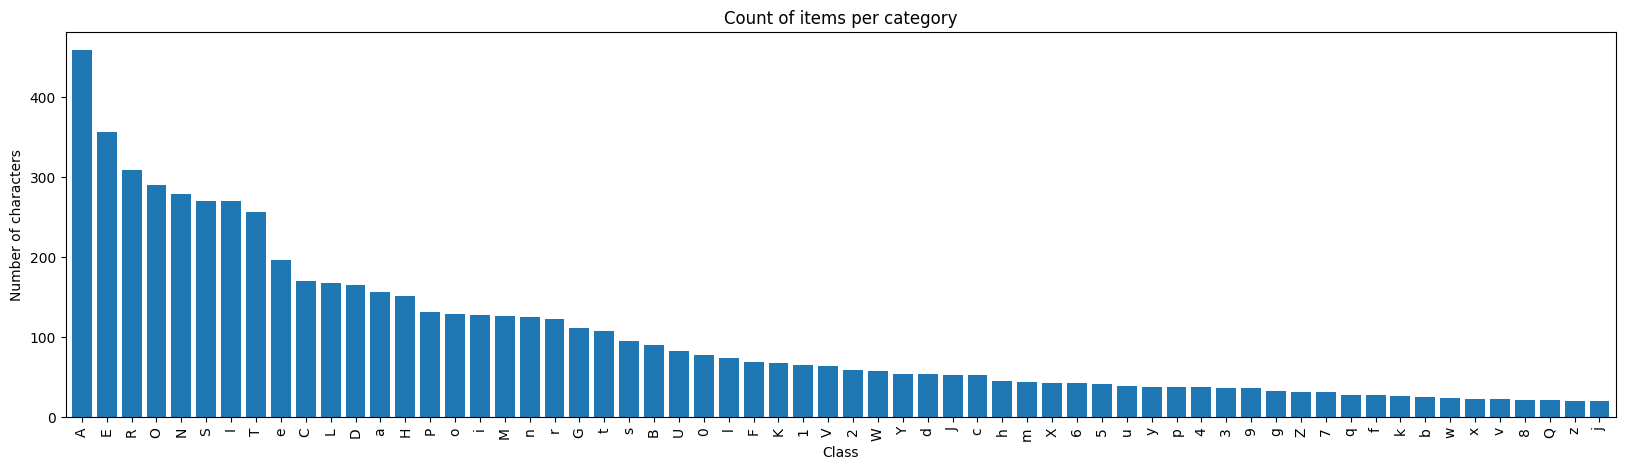

In [12]:
# Generate data visualization functions using bar charts
result = y.value_counts()
plt.figure(figsize=(20, 5))
plt.title("Count of items per category")
plt.xlabel("Characters")
plt.ylabel("Number of characters")
result.plot.bar(width=0.8)

In [13]:
X = X.drop("ID", axis=1)
print(f"Number of images: {X.shape[0]}\nNumber of pixels per image {X.shape[1]}")

X.head()

Number of images: 6283
Number of pixels per image 1


,img
0,/kaggle/output/street-view-getting-started-wit...
1,/kaggle/output/street-view-getting-started-wit...
2,/kaggle/output/street-view-getting-started-wit...
3,/kaggle/output/street-view-getting-started-wit...
4,/kaggle/output/street-view-getting-started-wit...


In [14]:
# Convert images into pixels
train_data_img = []
for img_path in train_data["img"]:
    img = image.imread(img_path)
    data = np.asarray(img)
    if data.shape != (20, 20, 3):
        data = np.repeat(data[:, :, np.newaxis], 3, axis=2)
    train_data_img.append(data)

img_data = np.asarray(train_data_img, dtype=np.uint8)
print("Convert completed")

Convert completed


In [15]:
img_data.shape

print(f"X: {X.shape[0]} size \nimg_data: {img_data.shape[0]} size")

X: 6283 size 
img_data: 6283 size


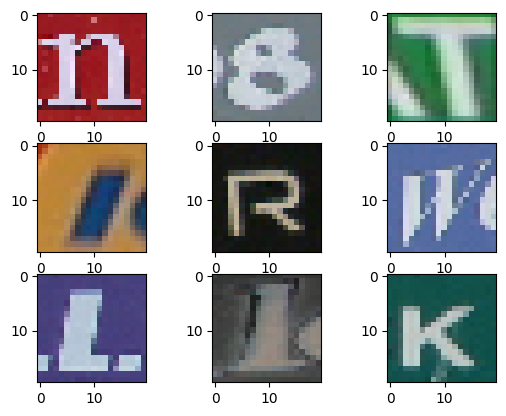

In [16]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(img_data[i])

# Generate data normalization function

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    zoom_range=0.2,
    rescale=1./255,
    rotation_range=5.0,
    shear_range=3.0,
    brightness_range=[0.0, 3.0]
)

In [18]:
X = img_data
X = np.array(X).astype(float) / 255
y = np.array(train_data["label"])

datagen.fit(X)
plt.figure(figsize=(20, 8))
datagen.flow(X, y, batch_size=10, shuffle=False)

<Figure size 2000x800 with 0 Axes>

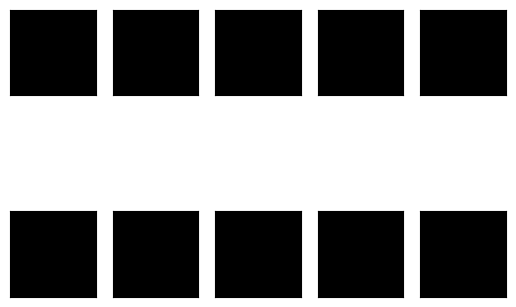

In [19]:
for img, label in datagen.flow(X, y, batch_size=10, shuffle=False):
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img[i])
    break

# Generate training and validation splitting

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)
data_gen_train = datagen.flow(X_train, y_train, batch_size=20)

num_pos = len(train_data["Class"].value_counts())

# Create and fit the model

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(20,20,3), activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(125, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(250, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_pos, activation='softmax')
])
print("Model built successfully")

Model built successfully


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Compile the model

In [22]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
print("Model compiled successfully")

Model compiled successfully


In [23]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor="accuracy")]

In [24]:
history = model.fit(
    data_gen_train,
    validation_data=(X_val, y_val),
    epochs=75,
    batch_size=32,
    callbacks=callbacks,
    validation_steps=5
)

Epoch 1/75


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0629 - loss: 3.9113 - val_accuracy: 0.0812 - val_loss: 3.9174
Epoch 2/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.0621 - loss: 3.7866 - val_accuracy: 0.0625 - val_loss: 3.9076
Epoch 3/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.0744 - loss: 3.7650 - val_accuracy: 0.0562 - val_loss: 3.7291
Epoch 4/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0691 - loss: 3.7777 - val_accuracy: 0.0312 - val_loss: 4.0000
Epoch 5/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.0716 - loss: 3.7832 - val_accuracy: 0.1000 - val_loss: 3.7999
Epoch 6/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.0786 - loss: 3.7814 - val_accuracy: 0.1063 - val_loss: 3.8304
Epoch 7/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.0703 - loss: 3.7992 - val_accuracy: 0.0750 - val_loss: 3.7600
Epoch 8/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.0691 - loss: 3.7928 - val_accuracy:

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


236/236 ━━━━━━━━━━━━━━━━━━━━ 62s 245ms/step - accuracy: 0.0722 - loss: 3.7745 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 12/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.0691 - loss: 3.7772 - val_accuracy: 0.0812 - val_loss: 3.6244
Epoch 13/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.0736 - loss: 3.7839 - val_accuracy: 0.0625 - val_loss: 3.8295
Epoch 14/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.0662 - loss: 3.7789 - val_accuracy: 0.0562 - val_loss: 3.7210
Epoch 15/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.0739 - loss: 3.7601 - val_accuracy: 0.0312 - val_loss: 3.9191
Epoch 16/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.0729 - loss: 3.7910 - val_accuracy: 0.1000 - val_loss: 3.7733
Epoch 17/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.0726 - loss: 3.7924 - val_accuracy: 0.1063 - val_loss: 3.8224
Epoch 18/75
236/236 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0745 - loss: 3.7915

<Axes: >

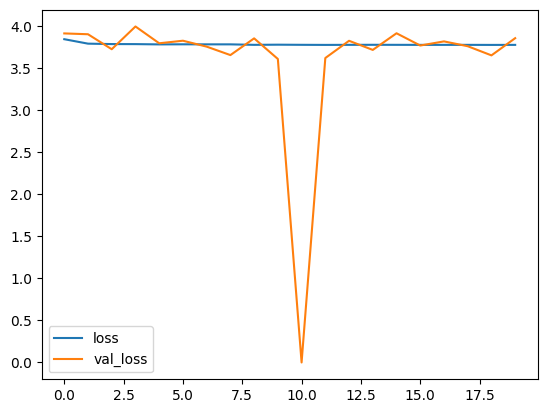

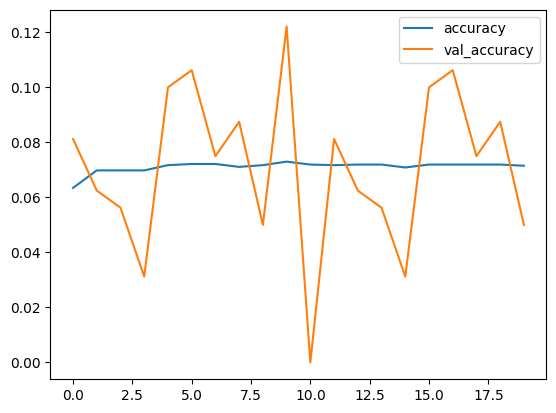

In [25]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [26]:
test_imgs = []
names = []

for dirname, _, filenames in os.walk(test_img_dir):
    for filename in filenames:
        test_imgs.append(os.path.join(dirname, filename))
        names.append(os.path.splitext(filename)[0])
test_imgs = np.array(test_imgs)
names = np.array(names)

In [27]:
test_data_img_list = []

for img_path in test_imgs:
    img = image.imread(img_path)
    data = np.asarray(img)
    if data.shape != (20, 20, 3):
        data = np.repeat(data[:, :, np.newaxis], 3, axis=2)
    data = data / 255.
    test_data_img_list.append(data)
test_data_img = np.asarray(test_data_img_list)

In [28]:
pred = model.predict(test_data_img)

195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


# Create a submission file

In [29]:
test = []
res = []

for i in range(0, len(pred)):
    res.append(unique_labels[np.argmax(pred[i])])
    test.append(np.argmax(pred[i]))

In [30]:
results = []
test = []

for i in range(0, len(pred)):
    results.append(unique_labels[np.argmax(pred[i])])
    test.append(np.argmax(pred[i]))

submission = pd.DataFrame(names, columns=['ID'])
submission['Class'] = results

In [31]:
submission.head(20)

,ID,Class
0,7899,A
1,7466,A
2,6485,A
3,6911,A
4,8662,A
5,10930,A
6,12453,A
7,8057,A
8,12446,A
9,6679,A


In [32]:
submission.to_csv('submission.csv', index=False)
print("Saved successfully as CSV file")

Saved successfully as CSV file
